In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [ ]:
# Read the data
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

In [ ]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

In [ ]:
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22748,22847,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,0,...,0,0,0,0,1,0,0,2,0,5


In [ ]:
# Separate features and target for training (total_sales)
X_train_total_sales = threshold_df.drop('total_sales', axis=1).values
y_train_total_sales = threshold_df['total_sales'].values

In [ ]:
# Separate features and target for testing (max_cart_value)
X_test_max_cart_value = threshold_df.drop('max_cart_value', axis=1).values
y_test_max_cart_value = threshold_df['max_cart_value'].values

In [ ]:
# Preprocessing
scaler = StandardScaler()
X_train_total_sales_scaled = scaler.fit_transform(X_train_total_sales)
X_test_max_cart_value_scaled = scaler.transform(X_test_max_cart_value)

In [ ]:
X_train_total_sales_scaled.shape

(414, 127)

In [ ]:
# Define and compile the model for training (total_sales)
model_total_sales = Sequential()
model_total_sales.add(Dense(128, activation='relu', input_shape=(X_train_total_sales_scaled.shape[1],)))
model_total_sales.add(Dense(64, activation='relu'))
model_total_sales.add(Dense(32, activation='relu'))
model_total_sales.add(Dense(1))  # Output layer with single node for regression
model_total_sales.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model for training (total_sales)
S=model_total_sales.fit(X_train_total_sales_scaled, y_train_total_sales, epochs=50, batch_size=32, validation_split=0.1)

# Predict total sales for testing data
y_pred_test_total_sales = model_total_sales.predict(X_test_max_cart_value_scaled)

Epoch 1/50
12/12 [==============================] - 1s 17ms/step - loss: 15824239.0000 - val_loss: 29266234.0000
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 15793987.0000 - val_loss: 29233892.0000
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 15719135.0000 - val_loss: 29152412.0000
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 15529249.0000 - val_loss: 28950162.0000
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 15033703.0000 - val_loss: 28524334.0000
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 14205999.0000 - val_loss: 27670852.0000
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 12521676.0000 - val_loss: 26235846.0000
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 10282153.0000 - val_loss: 24046150.0000
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 8219602.0000 - val_loss: 213260

In [ ]:
model_total_sales.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               16384     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 26753 (104.50 KB)
Trainable params: 26753 (104.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define and compile the model for testing (max_cart_value)
model_max_cart_value = Sequential()
model_max_cart_value.add(Dense(128, activation='relu', input_shape=(X_train_total_sales_scaled.shape[1],)))
model_max_cart_value.add(Dense(64, activation='relu'))
model_max_cart_value.add(Dense(32, activation='relu'))
model_max_cart_value.add(Dense(1))  # Output layer with single node for regression
model_max_cart_value.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model for testing (max_cart_value)
model_max_cart_value.fit(X_train_total_sales_scaled, y_train_total_sales, epochs=50, batch_size=32, S=0.1)

# Predict max cart value for testing data
y_pred_test_max_cart_value = model_max_cart_value.predict(X_test_max_cart_value_scaled)



Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 15825784.0000 - val_loss: 29263970.0000
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 15795036.0000 - val_loss: 29232354.0000
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 15736970.0000 - val_loss: 29162038.0000
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 15595314.0000 - val_loss: 28998808.0000
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 15216546.0000 - val_loss: 28644112.0000
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 14518108.0000 - val_loss: 27933276.0000
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 13156828.0000 - val_loss: 26718726.0000
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 11290104.0000 - val_loss: 24865424.0000
Epoch 9/50
12/12 [==============================] - 0s 7ms/step - loss: 9026502.0000 - val_loss: 225195

In [ ]:
# Evaluate the models
mse_total_sales = mean_squared_error(y_test_max_cart_value, y_pred_test_total_sales)
mse_max_cart_value = mean_squared_error(y_test_max_cart_value, y_pred_test_max_cart_value)

print("MSE for total_sales prediction on test data:", mse_total_sales)
print("MSE for max_cart_value prediction on test data:", mse_max_cart_value)

In [ ]:
model_max_cart_value.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               16384     
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 26753 (104.50 KB)
Trainable params: 26753 (104.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


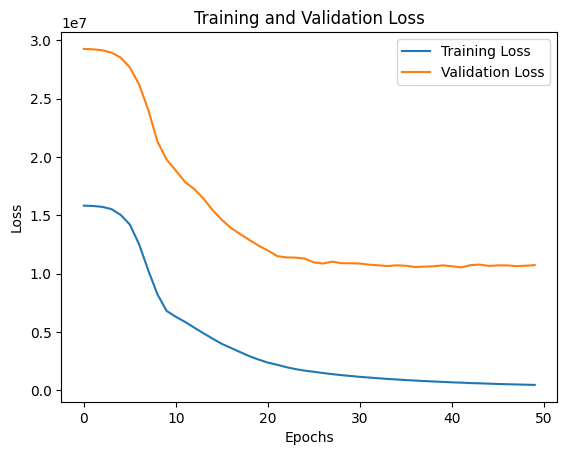

In [ ]:
import matplotlib.pyplot as plt
plt.plot(S.history['loss'], label='Training Loss')
plt.plot(S.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


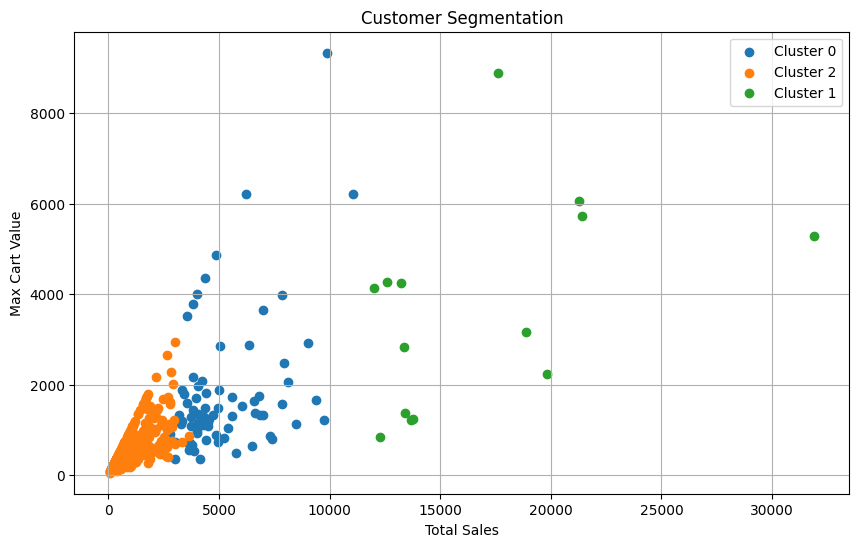

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Combine the predicted values from both models
y_pred_combined = np.concatenate((y_pred_test_total_sales, y_pred_test_max_cart_value), axis=1)

# Use KMeans clustering to segment customers based on predicted values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(y_pred_combined)

# Add the cluster labels to the dataframe
threshold_df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in threshold_df['cluster'].unique():
    cluster_data = threshold_df[threshold_df['cluster'] == cluster]
    plt.scatter(cluster_data['total_sales'], cluster_data['max_cart_value'], label=f'Cluster {cluster}')

plt.xlabel('Total Sales')
plt.ylabel('Max Cart Value')
plt.title('Customer Segmentation')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(y_pred_combined, kmeans.labels_)
print("Silhouette Score:", silhouette_score_value)


Silhouette Score: 0.7282716


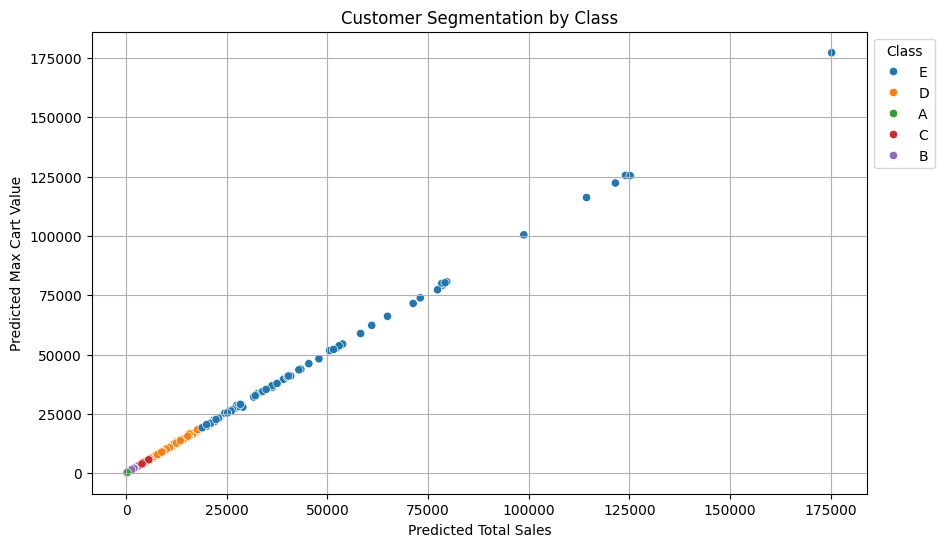

In [ ]:
import seaborn as sns


y_pred_combined = np.concatenate((y_pred_test_total_sales, y_pred_test_max_cart_value), axis=1)

# Combine the predicted values with the original data
threshold_df['total_sales_pred'] = y_pred_combined[:, 0]
threshold_df['max_cart_value_pred'] = y_pred_combined[:, 1]

# Define class A based on thresholds
a_error_threshold = np.percentile(threshold_df['total_sales_pred'], 20)
a_spending_threshold = np.percentile(threshold_df['max_cart_value_pred'], 20)

threshold_df.loc[(threshold_df['total_sales_pred'] < a_error_threshold) &
                 (threshold_df['max_cart_value_pred'] < a_spending_threshold), 'Class'] = 'A'

# Define thresholds for class B
b_error_threshold = np.percentile(threshold_df['total_sales_pred'], 40)
b_spending_threshold = np.percentile(threshold_df['max_cart_value_pred'], 40)

threshold_df.loc[(threshold_df['total_sales_pred'] >= a_error_threshold) &
                 (threshold_df['total_sales_pred'] < b_error_threshold) &
                 (threshold_df['max_cart_value_pred'] >= a_spending_threshold) &
                 (threshold_df['max_cart_value_pred'] < b_spending_threshold), 'Class'] = 'B'

# Define thresholds for class C
c_error_threshold = np.percentile(threshold_df['total_sales_pred'], 60)
c_spending_threshold = np.percentile(threshold_df['max_cart_value_pred'], 60)

threshold_df.loc[(threshold_df['total_sales_pred'] >= b_error_threshold) &
                 (threshold_df['total_sales_pred'] < c_error_threshold) &
                 (threshold_df['max_cart_value_pred'] >= b_spending_threshold) &
                 (threshold_df['max_cart_value_pred'] < c_spending_threshold), 'Class'] = 'C'

# Define thresholds for class D
d_error_threshold = np.percentile(threshold_df['total_sales_pred'], 80)
d_spending_threshold = np.percentile(threshold_df['max_cart_value_pred'], 80)

threshold_df.loc[(threshold_df['total_sales_pred'] >= c_error_threshold) &
                 (threshold_df['total_sales_pred'] < d_error_threshold) &
                 (threshold_df['max_cart_value_pred'] >= c_spending_threshold) &
                 (threshold_df['max_cart_value_pred'] < d_spending_threshold), 'Class'] = 'D'

# Define thresholds for class E
e_error_threshold = np.percentile(threshold_df['total_sales_pred'], 100)
e_spending_threshold = np.percentile(threshold_df['max_cart_value_pred'], 100)

threshold_df.loc[(threshold_df['total_sales_pred'] >= d_error_threshold) &
                 (threshold_df['total_sales_pred'] <= e_error_threshold) &
                 (threshold_df['max_cart_value_pred'] >= d_spending_threshold) &
                 (threshold_df['max_cart_value_pred'] <= e_spending_threshold), 'Class'] = 'E'

# Visualize segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sales_pred', y='max_cart_value_pred', hue='Class', data=threshold_df)
plt.title('Customer Segmentation by Class')
plt.xlabel('Predicted Total Sales')
plt.ylabel('Predicted Max Cart Value')
plt.legend(title='Class', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()